## 분석에 필요한 다양한 라이브러리를 import합니다.

In [1]:
# 라이브러리 불러오기
import pandas as pd
# 1. pandas: 데이터를 빠르고 강력하게, 그리고 유연하고 쉽게 다룰 수 있게 해주는 데이터 분석, 증강 도구입니다.
#    - <https://pandas.pydata.org/docs/user_guide/index.html>
import numpy as np
# 2. numpy: 파이썬에서 수치 계산을 빠르게 수행할 수 있게 해주는 도구입니다.
#    - <https://numpy.org/doc/stable/>
import matplotlib.pyplot as plt
# 3. matplolib: 정적, 애니메이션, 또는 상호작용형 시각화를 생성하기 위한 포괄적인 도구입니다.
#    - <https://matplotlib.org/stable/users/index>

## 모델 학습에 사용할 데이터셋을 불러옵니다.

In [2]:
pd.set_option('display.max_columns', None)
Data_PATH_train = '../0.Data/tox21_train.csv'
# 전처리를 완료한 데이터셋을 불러옵니다.
# 이때, 상대 경로나 절대 경로를 지정하여 파일의 위치를 지정해주어야 합니다.
df_train = pd.read_csv(Data_PATH_train)
# pandas 라이브러리의 read_csv 메소드를 활용하여 csv 파일을 load합니다.
df_train

,maccs_1,maccs_2,maccs_3,maccs_4,maccs_5,maccs_6,maccs_7,maccs_8,maccs_9,maccs_10,maccs_11,maccs_12,maccs_13,maccs_14,maccs_15,maccs_16,maccs_17,maccs_18,maccs_19,maccs_20,maccs_21,maccs_22,maccs_23,maccs_24,maccs_25,maccs_26,maccs_27,maccs_28,maccs_29,maccs_30,maccs_31,maccs_32,maccs_33,maccs_34,maccs_35,maccs_36,maccs_37,maccs_38,maccs_39,maccs_40,maccs_41,maccs_42,maccs_43,maccs_44,maccs_45,maccs_46,maccs_47,maccs_48,maccs_49,maccs_50,maccs_51,maccs_52,maccs_53,maccs_54,maccs_55,maccs_56,maccs_57,maccs_58,maccs_59,maccs_60,maccs_61,maccs_62,maccs_63,maccs_64,maccs_65,maccs_66,maccs_67,maccs_68,maccs_69,maccs_70,maccs_71,maccs_72,maccs_73,maccs_74,maccs_75,maccs_76,maccs_77,maccs_78,maccs_79,maccs_80,maccs_81,maccs_82,maccs_83,maccs_84,maccs_85,maccs_86,maccs_87,maccs_88,maccs_89,maccs_90,maccs_91,maccs_92,maccs_93,maccs_94,maccs_95,maccs_96,maccs_97,maccs_98,maccs_99,maccs_100,maccs_101,maccs_102,maccs_103,maccs_104,maccs_105,maccs_106,maccs_107,maccs_108,maccs_109,maccs_110,maccs_111,maccs_112,maccs_113,maccs_114,maccs_115,maccs_116,maccs_117,maccs_118,maccs_119,maccs_120,maccs_121,maccs_122,maccs_123,maccs_124,maccs_125,maccs_126,maccs_127,maccs_128,maccs_129,maccs_130,maccs_131,maccs_132,maccs_133,maccs_134,maccs_135,maccs_136,maccs_137,maccs_138,maccs_139,maccs_140,maccs_141,maccs_142,maccs_143,maccs_144,maccs_145,maccs_146,maccs_147,maccs_148,maccs_149,maccs_150,maccs_151,maccs_152,maccs_153,maccs_154,maccs_155,maccs_156,maccs_157,maccs_158,maccs_159,maccs_160,maccs_161,maccs_162,maccs_163,maccs_164,maccs_165,maccs_166,NR-AR
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,1,1,0,1,0,1,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [3]:
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:,-1]

# Train 과정에 사용할 데이터와 Test 과정에 사용할 데이터를 load한 이후, 
# 해당 데이터 중에서 독립변수와 반응변수를 별도로 저장해줍니다.

# df_train은 X_train(독립변수), y_train(반응변수)로 분할합니다.
# maccs_1열[column = 0]부터 maccs_166열[column = 165]까지는 독립변수이고, 마지막 열(NR-AR)은 반응변수(정답값)입니다.

print(X_train.shape, y_train.shape)

(11130, 166) (11130,)


## 모델을 생성합니다.

In [4]:
from sklearn.neural_network import MLPClassifier as mlp

model = mlp(hidden_layer_sizes=(100, 70, 50, 30, 10), activation='relu', solver='adam', alpha=0.001, learning_rate_init=0.001, max_iter=50, random_state=42)
model.fit(X_train, y_train)

# 학습에 사용할 모델은 Multi Layer Perceptron(MLP) 입니다.
# - Multi Layer Perceptron(MLP)는 여러 은닉층과 비선형 활성화함수를 사용하여 복잡한 데이터 패턴을 학습할 수 있는 신경망(Neural Network) 모델입니다.
# - MLP는 특성 간의 복잡한 관계를 모델링하고, 이를 바탕으로 회귀 문제를 포함한 다양한 문제의 예측이 가능합니다.
# - MLP는 내부적으로 여러 은닉층을 비롯한 계층들의 가중치를 조절하는 과정을 거치며, 이 과정에서 back-propagation과 gradient descent 방법을 사용합니다.
# - MLP의 활성화 함수(Activation Function)에는 여러가지 비선형 함수가 쓰이며 대표적으로, (Leaky) ReLU, Sigmoid 함수 등이 사용됩니다. 

MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 70, 50, 30, 10),
              max_iter=50, random_state=42)

## Multi-Layer Perceptron (MLP)의 주요 하이퍼파라미터

- `hidden_layer_sizes`: 모델에 있는 은닉층의 크기와 수를 정의합니다. 이 파라미터는 튜플 형태로 각 은닉층의 뉴런 수를 지정합니다. 예를 들어, (100,)는 100개의 뉴런을 가진 단일 은닉층을 의미하며, (50, 30)은 첫 번째 은닉층에 50개, 두 번째 은닉층에 30개의 뉴런을 갖습니다.
- `activation`: 뉴런의 출력을 결정하는 활성화 함수를 지정합니다. 일반적으로 `relu`, `tanh`, `logistic` 등이 사용되며, 은닉층의 중첩을 방지하여 깊은 모델 설계를 가능하게 합니다.
- `solver`: 최적화에 사용될 알고리즘을 선택합니다. `adam`, `sgd`(확률적 경사 하강법), `lbfgs` 등이 있으며, 각각 다른 특성과 성능을 가집니다.
- `alpha`: L2 정규화 항의 가중치로, 오버피팅을 방지하는 데 사용됩니다. 값이 클수록 모델의 복잡도가 감소합니다.
- `learning_rate_init`: `solver`가 `sgd` 또는 `adam`일 경우 사용되며, 학습률의 초기값을 설정합니다. 이 값은 학습 과정에서 가중치가 얼마나 업데이트될지를 결정합니다.
- `max_iter`: 최대 반복 횟수로, 학습 과정에서의 에포크 수를 의미합니다. 충분한 반복 횟수는 모델이 데이터에 잘 적응할 수 있도록 하지만, 너무 많은 반복은 과적합을 유발할 수 있습니다.
- `tol`: 학습을 중단할 허용 오차를 설정합니다. 이 값보다 작은 성능 향상이 이루어지지 않으면, 학습이 조기에 종료됩니다.

### 사용 시 고려 사항

- MLP는 다양한 하이퍼파라미터를 통해 모델의 구조와 학습 과정을 세밀하게 조정할 수 있습니다. 적절한 하이퍼파라미터의 선택은 문제의 특성과 데이터에 달라집니다.
- 데이터의 전처리 과정(예: 정규화 또는 표준화)은 MLP 모델의 성능에 큰 영향을 미칠 수 있으므로, 학습 전에 적절한 처리가 필요합니다.
- `solver`, `activation`, `alpha` 등의 파라미터는 모델의 학습 속도와 최종 성능에 직접적인 영향을 미치므로, 신중하게 선택해야 합니다.

### 참고 자료

- 공식 문서 링크: (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

MLP는 그 유연성과 강력한 모델링 능력으로 인해 다양한 기계 학습 문제에 널리 적용되고 있습니다. 이러한 특성 때문에, MLP는 복잡한 문제를 해결하고자 할 때 매우 유용합니다.


## Multi Layer Perceptron(MLP)의 목적함수

이진 분류 문제에서 MLP 분류기의 목적 함수는 일반적으로 이진 크로스 엔트로피 손실 함수를 사용합니다. 이 함수는 예측된 확률과 실제 클래스 레이블 사이의 차이를 계산합니다. 목적은 이 손실 함수를 최소화하는 것입니다:

$$
\text{Loss} = -\frac{1}{N} \sum_{i=1}^{N} [y_i \log(p_i) + (1 - y_i) \log(1 - p_i)]
$$

여기서:
- $N$은 데이터 포인트의 총 개수입니다.
- $y_i$는 $i$번째 데이터 포인트의 실제 레이블입니다. 이진 분류에서 $y_i$는 0 또는 1의 값을 가집니다.
- $p_i$는 모델이 $i$번째 데이터 포인트가 양성 클래스(1)로 분류될 확률을 예측한 값입니다.

MLPClassifier 및 그 설정에 대한 자세한 정보는 scikit-learn 공식 문서에서 확인할 수 있습니다:

- MLPClassifier 문서: [(https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

이 문서는 MLPClassifier의 사용 방법, 파라미터 설명, 예제 코드 등을 제공합니다.

## Multi Layer Perceptron(MLP) Feature Importance 시각화

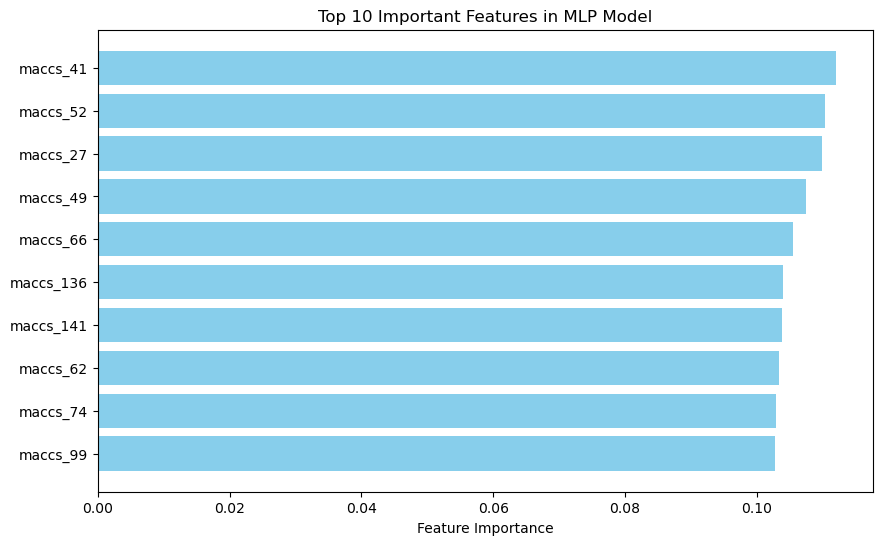

In [5]:
import matplotlib.pyplot as plt

feature_importances = np.abs(model.coefs_[0]).mean(axis=1)

# - Multi-Layer Perceptron (MLP) 모델의 특성 중요도를 추정하고 시각화합니다.

# 특성 중요도 시각화

# - 첫 번째 은닉층의 가중치(`model.coefs_[0]`)의 절대 평균을 사용하여 각 특성의 중요도를 계산합니다. 이는 MLP 모델에서 각 입력 특성이 결과 예측에 미치는 영향력의 대략적인 지표로 사용됩니다.
# - 이를 바탕으로 상위 10개 특성을 label과 함께 시각화합니다.

# 특성 중요도를 기반으로 상위 10개 특성 선정
top_10_idx = np.argsort(feature_importances)[-10:][::-1]
top_10_importances = feature_importances[top_10_idx]
top_10_feature_names = [f"maccs_{i+1}" for i in top_10_idx]

# 상위 10개 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(top_10_feature_names, top_10_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features in MLP Model')
plt.gca().invert_yaxis()  # 상위 중요도 특성이 위로 오도록 y축 순서 뒤집기
plt.show()

## Multi Layer Perceptron(MLP) Loss Function 시각화

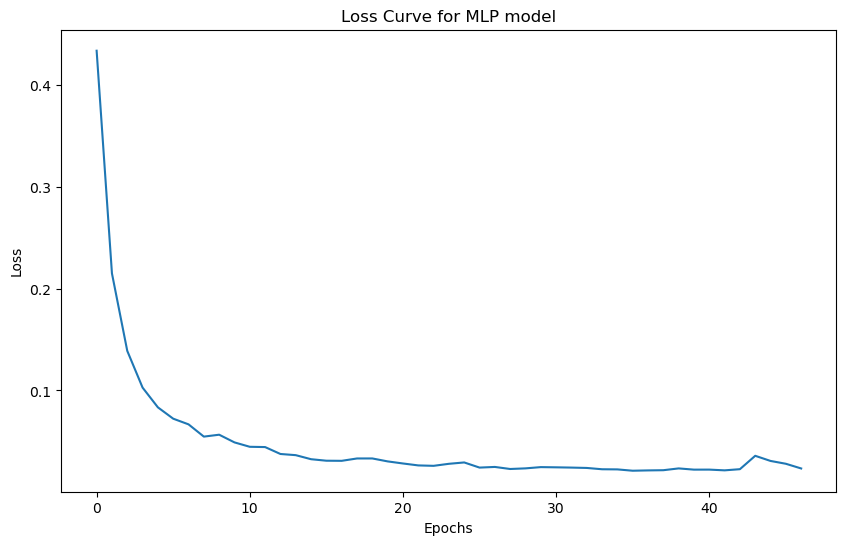

In [6]:
import matplotlib.pyplot as plt

# 손실 곡선 시각화

# - `model.loss_curve_`에 저장된 손실 값(에포크당 계산된 손실)을 이용하여 에포크(반복 학습) 대비 손실 곡선을 그립니다.
# - 해당 곡선은 모델이 학습되는 동안 손실 값이 어떻게 변하는지를 시각화합니다.

# 손실 곡선 그리기
plt.figure(figsize=(10, 6))
plt.plot(model.loss_curve_)
plt.title('Loss Curve for MLP model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## 결정 경계 시각화

c:\Users\113bommy\anaconda3\envs\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


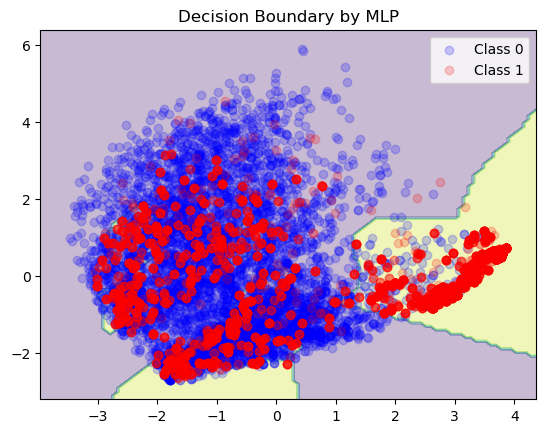

Confusion Matrix in X_pca Dataset


array([[4239, 1326],
       [1181, 4384]], dtype=int64)

In [7]:
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

# PCA를 사용하여 피처를 2개로 줄이기
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# MLP 모델 학습
model_pca = mlp(hidden_layer_sizes=(100, 70, 50, 30, 10), activation='relu', solver='adam', alpha=0.001, learning_rate_init=0.001, max_iter=100, random_state=42)
model_pca.fit(X_pca, y_train)

# 결정 경계 시각화를 위한 그리드 생성 
x1s = np.linspace(X_pca[:, 0].min()-0.5, X_pca[:, 0].max()+0.5, 100)
# x1s: X_pca의 첫 번째 열의 최솟값에서 0.5를 뺀 값부터 최댓값에서 0.5를 더한 값까지 100개의 구간으로 나눈 배열
x2s = np.linspace(X_pca[:, 1].min()-0.5, X_pca[:, 1].max()+0.5, 100)
# x2s: X_pca의 두 번째 열의 최솟값에서 0.5를 뺀 값부터 최댓값에서 0.5를 더한 값까지 100개의 구간으로 나눈 배열
x1, x2 = np.meshgrid(x1s, x2s)
# x1, x2: x1s와 x2s를 격자로 나눈 배열
X_new = np.c_[x1.ravel(), x2.ravel()]
# X_new: x1과 x2를 1차원 배열로 변환한 후, 열로 합친 배열

# MLP 모델을 사용하여 예측
y_pred = model_pca.predict(X_new).reshape(x1.shape)

# 결정 경계 및 데이터 포인트 시각화
plt.contourf(x1, x2, y_pred, alpha=0.3)
# x1, x2, y_pred를 사용하여 등고선을 그립니다.
plt.scatter(X_pca[:, 0][y_train==0], X_pca[:, 1][y_train==0], color='blue', alpha=0.2, label='Class 0')
# y가 0인 행을 파란색으로 점으로 표시합니다.
plt.scatter(X_pca[:, 0][y_train==1], X_pca[:, 1][y_train==1], color='red', alpha=0.2, label='Class 1')
# y가 1인 행을 빨간색으로 점으로 표시합니다.
plt.title("Decision Boundary by MLP")
plt.legend()
plt.show()

# 아래 그림은 두 Feature를 사용하여 Multi-Layer Perceptron (MLP)를 학습한 결과입니다. 2차원 축을 사용하여 결정 경계를 쉽게 표현할 수 있기에 Feature 개수를 2개로 줄인 후 이를 시각화하였습니다.

print("Confusion Matrix in X_pca Dataset")
confusion_matrix(y_train, model_pca.predict(X_pca))
# 혼동 행렬을 출력합니다.

## 혼동 행렬을 출력합니다.

In [8]:
# 혼동 행렬
from sklearn.metrics import confusion_matrix

Data_PATH_test = '../0.Data/tox21_test.csv'
df_test = pd.read_csv(Data_PATH_test)
# 전처리를 완료한 데이터셋을 불러옵니다.
# 이때, 상대 경로나 절대 경로를 지정하여 파일의 위치를 지정해주어야 합니다.

X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:,-1]
# df_test는 X_test(독립변수), y_test(반응변수)로 분할합니다.

print("Confusion Matrix in Test Dataset")
confusion_matrix(y_test, model.predict(X_test))

# 혼동행렬은 2x2 행렬로, 실제 클래스와 예측 클래스가 일치하는지 여부에 따라 4개의 값을 가집니다.
# - 1344개의 샘플이 0으로 예측되고 실제로 0입니다. (True Negative)
# - 47개의 샘플이 1로 예측되고 실제로 0입니다. (False Positive)
# - 38개의 샘플이 0으로 예측되고 실제로 1입니다. (False Negative)
# - 24개의 샘플이 1로 예측되고 실제로 1입니다. (True Positive)

Confusion Matrix in Test Dataset


array([[1344,   47],
       [  38,   24]], dtype=int64)